In [1]:
import numpy as np
from scipy.io import savemat, loadmat
from scipy.optimize import linprog

import matplotlib.pyplot as plt

In [2]:
quantile = loadmat("quantile.mat")
xTrain, yTrain = quantile["xTrain"].flatten(), quantile["yTrain"].flatten()

In [3]:
# Constants
N = xTrain.size

In [4]:
def find_line(tau):
    """
    Return the slope corresponding to the tau'th quantile.
    """
    c = np.concatenate((
        np.ones(N) * tau, # u
        np.ones(N) * (1 - tau), # v
        [0], # slope
        [0], # intercept
    ))

    A_ub = -np.identity(2 * N + 2)
    A_ub = A_ub[:-2]
    b_ub = np.zeros((2 * N,)).T

    A_eq = np.zeros((N, 2 * N + 2))
    A_eq[:, :N] = np.identity(N)
    A_eq[:, N:2*N] = -np.identity(N)
    A_eq[:, -2] = xTrain.T
    A_eq[:, -1] = 1
    
    b_eq = yTrain.transpose()
    
    bounds = [(None, None)] * (2 * N + 2)
    
    result = linprog(c, A_ub, b_ub, A_eq, b_eq, bounds).x
    m = result[-2] # slope
    b = result[-1] # intercept
    return (m, b)

tau = 0.75 | slope = 0.21740773372818534 | intercept = 0.4492025040398797
tau = 0.5 | slope = 0.23820824709390254 | intercept = -0.3307244016150209
tau = 0.25 | slope = 0.22136016726775787 | intercept = -0.9926835520240038


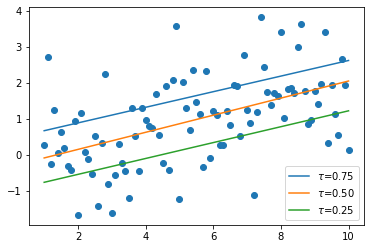

In [11]:
plt.scatter(xTrain, yTrain)
x = np.linspace(min(xTrain), max(xTrain), 50)
for tau in [0.75, 0.50, 0.25]:
    m, b = find_line(tau)
    print("tau =", tau, "|", "slope =", m, "|", "intercept =", b)
    plt.plot(x, m * x + b, label=f"$\\tau$={tau:.2f}")
plt.legend()
plt.show()